#  Model `NMFSklearn`

In [17]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

[I] Found settings.ini at /Users/felixnie/MEGA/PyBMF/examples/settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/datasets/BaseData.py:101: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(handle)


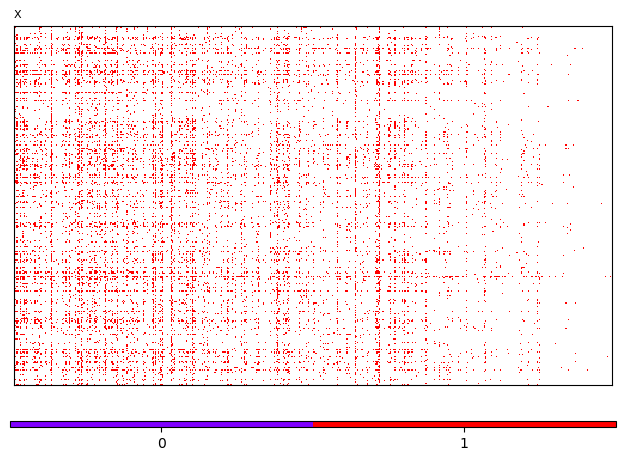

<Figure size 640x480 with 0 Axes>

In [19]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [20]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722575927
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722575927
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 10754
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


[I] k            : 15
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvda
[I] solver       : mu
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] save_model   : False
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-02 13-18-47-135411 NMFSklearn
[I] U, V existed. Skipping initialization.
[I] time elapsed :  0s


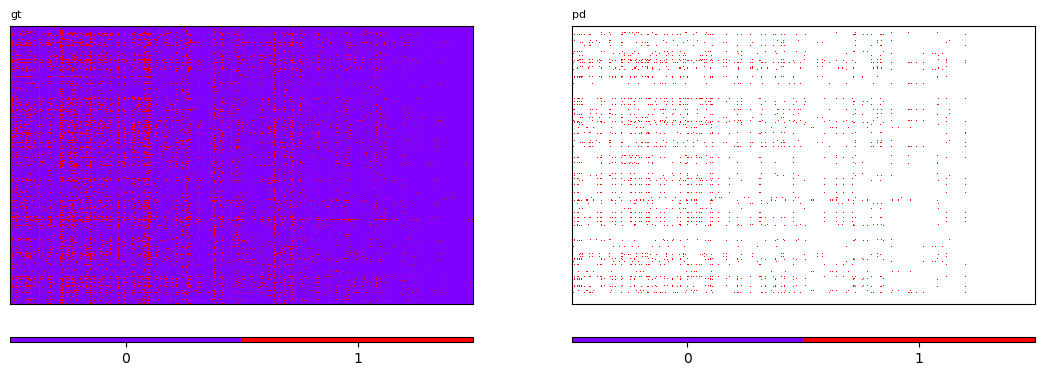

<Figure size 640x480 with 0 Axes>

In [21]:
from PyBMF.models import NMFSklearn

k = 15
beta_loss = 'frobenius'
init_method='nndsvda'
solver = 'mu'

model_nmf = NMFSklearn(k=k, beta_loss=beta_loss, init_method=init_method, solver=solver, max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, save_model=False)

# Adjust the threshold of the prediction

Note that this is not Boolean multiplication.

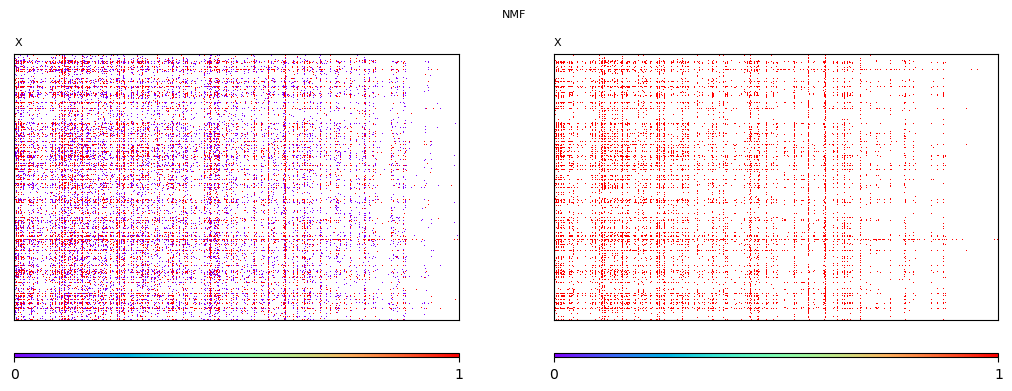

<Figure size 640x480 with 0 Axes>

In [22]:
from PyBMF.utils import show_matrix, binarize, to_sparse

X = model_nmf.U @ model_nmf.V.T
X = binarize(X, 0.35)
X = to_sparse(X)
show_matrix([(X_train, [0, 0], 'X'), (X, [0, 1], 'X')], clim=[0, 1], colorbar=True, title='NMF')

# Adjust the threshold of the factors

This shows that thresholding methods like `BinaryMFThreshold` can be used to improve the NMF results in approximating BMF.

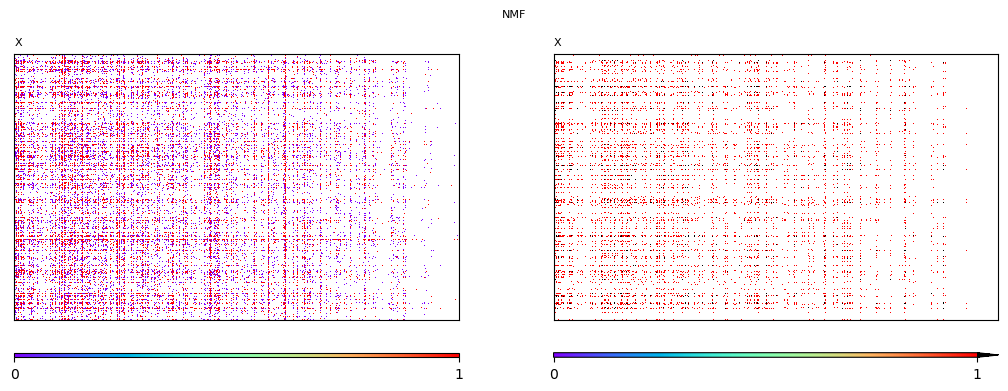

<Figure size 640x480 with 0 Axes>

In [23]:
from PyBMF.utils import show_matrix, binarize, to_sparse

X = binarize(model_nmf.U, 0.35) @ binarize(model_nmf.V.T, 0.35)
X = to_sparse(X)
show_matrix([(X_train, [0, 0], 'X'), (X, [0, 1], 'X')], clim=[0, 1], colorbar=True, title='NMF')